LOADING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

LOADING DATASET

In [83]:
df = pd.read_csv('Tesce Store.csv',encoding='ISO-8859-1') 
df.sample(5) 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
32893,47739,DJ-2011-470,20-09-2011,26-09-2011,Standard Class,ER-3855,Elpida Rittenbach,Corporate,Djibouti,Djibouti,...,OFF-ACC-10003422,Office Supplies,Binders,"Acco Binder, Durable",16.650,1,0.00,4.6500,2.34,Low
23349,28248,IN-2014-71004,14-11-2014,19-11-2014,Standard Class,RM-19750,Roland Murray,Consumer,Angeles City,Central Luzon,...,OFF-BI-10004986,Office Supplies,Binders,"Ibico 3-Hole Punch, Recycled",52.377,2,0.15,19.6770,3.83,Medium
18209,31707,CA-2014-117457,9/12/2014,13-12-2014,Standard Class,KH-16510,Keith Herrera,Consumer,San Francisco,California,...,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,28.350,9,0.00,13.6080,2.07,Medium
1270,32036,CA-2011-112326,5/1/2011,9/1/2011,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,...,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.20,4.2717,0.99,High
20995,19383,ES-2014-2509408,13-08-2014,19-08-2014,Standard Class,GZ-14545,George Zrebassa,Corporate,Palaiseau,Ile-de-France,...,OFF-FA-10003139,Office Supplies,Fasteners,"Advantus Push Pins, Assorted Sizes",35.640,3,0.00,7.1100,4.11,Medium


In [84]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


DATA CLEANING

In [85]:
df.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)

In [86]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

In [87]:
df.dtypes

Row_ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer_Name      object
Segment            object
City               object
State              object
Country            object
Postal_Code       float64
Market             object
Region             object
Product_ID         object
Category           object
Sub_Category       object
Product_Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
dtype: object

In [88]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"]) 
df["Order_Date"].sample(5)

33683   2013-12-20
37704   2013-07-23
40468   2012-02-25
45376   2014-11-27
2461    2011-09-02
Name: Order_Date, dtype: datetime64[ns]

In [89]:
df['year'] = df["Order_Date"].dt.year
df['month'] = df['Order_Date'].values.astype('datetime64[M]')

In [90]:
df.isnull().sum(axis=0)

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       41296
Market                0
Region                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
year                  0
month                 0
dtype: int64

In [91]:
df.drop(["Postal_Code"],axis=1, inplace=True)

In [92]:
df.duplicated().sum()

0

DATA ANALYSIS

In [93]:
saless = df[['Order_Date','Sales','Quantity','Profit','year','month']]
saless.sample(5)  

,Order_Date,Sales,Quantity,Profit,year,month
6077,2012-08-03,631.5120,2,-63.1680,2012,2012-08-01
1429,2011-05-10,244.7280,4,67.9680,2011,2011-05-01
48961,2014-01-30,12.9600,2,6.2208,2014,2014-01-01
20926,2013-08-13,43.6590,1,10.6590,2013,2013-08-01
29151,2014-06-18,175.4703,3,35.8803,2014,2014-06-01


In [61]:
salesyear = saless.groupby(['year','month']).sum()
salesyear

Sales  Quantity       Profit
year month                                          
2011 2011-01-01  138241.30042      2178  13457.23302
     2011-02-01  134969.94086      1794  17588.83726
     2011-03-01  171455.59372      2183  16169.36062
     2011-04-01  128833.47034      2181  13405.46924
     2011-05-01  148146.72092      2057  14777.45792
     2011-06-01  189338.43966      2715  25932.87796
     2011-07-01  162034.69756      2266  10631.84406
     2011-08-01  219223.49524      2909  19650.67124
     2011-09-01  255237.89698      3357  32313.25458
     2011-10-01  204675.07846      2615  30745.54166
     2011-11-01  214934.29386      3165  21261.40536
     2011-12-01  292359.96752      4023  33006.85862
2012 2012-01-01  162800.89338      2150  19627.42058
     2012-02-01  152661.15144      2156  17828.18244
     2012-03-01  201608.72784      2880  22752.87684
     2012-04-01  187469.96192      2506  20804.00532
     2012-05-01  218960.16042      3239  22865.39572
     2012-06-01  249289.77172      3508  34358.03962
     2012-07-01  174394.02808      2551  21725.18808
     2012-08-01  271669.66086      3451  36511.44996
     2012-09-01  256567.85308      3752  25039.93498
     2012-10-01  239321.09904      3399  27773.87454
     2012-11-01  270723.05356      4497  26160.60686
     2012-12-01  291972.33306      4022  31968.30416
2013 2013-01-01  206459.19582      2766  26052.40252
     2013-02-01  191062.77216      2535  31553.99756
     2013-03-01  230547.79468      3130  34873.71938
     2013-04-01  233181.34844      3161  26008.05144
     2013-05-01  304509.96336      4115  39053.30946
     2013-06-01  341162.34370      4948  43298.85000
     2013-07-01  223642.65664      3594  27019.91294
     2013-08-01  323876.60716      4564  32977.75576
     2013-09-01  326897.27044      5067  18850.09084
     2013-10-01  270121.87570      3977  27871.97470
     2013-11-01  383039.21248      5274  51720.88568
     2013-12-01  371245.40880      5005  47654.27990
2014 2014-01-01  268265.52240      3656  31447.74660
     2014-02-01  244159.30486      3450  29454.01876
     2014-03-01  347720.96868      4820  50097.04458
     2014-04-01  302132.54000      4397  35709.53320
     2014-05-01  304798.83604      4415  34335.60404
     2014-06-01  372577.23298      5528  40869.02108
     2014-07-01  278672.17326      3867  26450.70856
     2014-08-01  432731.04194      5506  46443.47934
     2014-09-01  405436.70584      5741  52533.83284
     2014-10-01  406659.41500      5915  52342.49740
     2014-11-01  508954.73156      7020  55561.72406
     2014-12-01  427757.39800      6307  48920.76000

In [62]:
year_2011 = salesyear.loc[(2011,slice(None)),:].reset_index()
year_2012 = salesyear.loc[(2012,slice(None)),:].reset_index()
year_2013 = salesyear.loc[(2013,slice(None)),:].reset_index()
year_2014 = salesyear.loc[(2014,slice(None)),:].reset_index()

In [63]:
year_2014

,year,month,Sales,Quantity,Profit
0,2014,2014-01-01,268265.52240,3656,31447.74660
1,2014,2014-02-01,244159.30486,3450,29454.01876
2,2014,2014-03-01,347720.96868,4820,50097.04458
3,2014,2014-04-01,302132.54000,4397,35709.53320
4,2014,2014-05-01,304798.83604,4415,34335.60404
5,2014,2014-06-01,372577.23298,5528,40869.02108
6,2014,2014-07-01,278672.17326,3867,26450.70856
7,2014,2014-08-01,432731.04194,5506,46443.47934
8,2014,2014-09-01,405436.70584,5741,52533.83284
9,2014,2014-10-01,406659.41500,5915,52342.49740


In [94]:
sales=pd.concat([year_2011['Sales'],year_2012['Sales'],
                 year_2013['Sales'],year_2014['Sales']],axis=1)

 
sales.columns=['Sales-2011','Sales-2012','Sales-2013','Sales-2014']
sales.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


In [95]:
sales.style.background_gradient()

,Sales-2011,Sales-2012,Sales-2013,Sales-2014
Jan,138241,162801,206459,268266
Feb,134970,152661,191063,244159
Mar,171456,201609,230548,347721
Apr,128833,187470,233181,302133
May,148147,218960,304510,304799
Jun,189338,249290,341162,372577
Jul,162035,174394,223643,278672
Aug,219223,271670,323877,432731
Sep,255238,256568,326897,405437
Oct,204675,239321,270122,406659


From the above figure we can conclude that there has been an accretion in the sales figure over the years. We don't need to have an amazing buisness acumen to conclude that sales eperformance has grown rapidly and devlopment is really good. 

,sales_sum,rise_rate
Sales-2011,2.259451e+06,0.000000
Sales-2012,2.677439e+06,0.184995
Sales-2013,3.405746e+06,0.272017
Sales-2014,4.299866e+06,0.262533


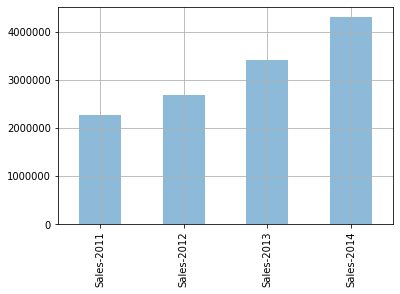

In [67]:
sales_sum=sales.sum()
sales_sum.plot(kind='bar',alpha=0.5)
plt.grid()


rise_12=sales_sum[1]/sales_sum[0]-1
rise_13=sales_sum[2]/sales_sum[1]-1
rise_14=sales_sum[3]/sales_sum[2]-1
rise_rate=[0,rise_12,rise_13,rise_14]


sales_sum=pd.DataFrame({'sales_sum':sales_sum})
sales_sum['rise_rate']=rise_rate
sales_sum

It can be seen from the above that the sales growth rate in the next two years reached 26%, and the sales in 2014 were nearly twice that in 2011. The development momentum is good and the operation is gradually stable. Combined with annual sales and growth rates, combined with the company's overall strategic planning, it is possible to predict or formulate total sales performance indicators for the next year.

After understanding the overall sales of the supermarket, analyze the monthly sales each year to understand the sales in different months, find out whether there are low and peak seasons, and find out the key sales months in order to formulate business strategies and performance monthly and quarterly Indicator split.

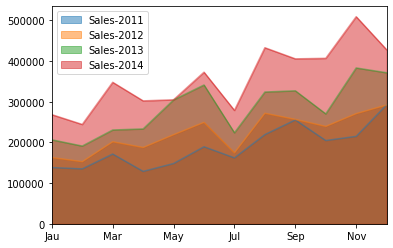

In [19]:
sales.plot.area(stacked=False)

As can be generally seen from the above picture, the grocery store's deals are occasional. In general, the primary portion of the year is the slow time of year and the subsequent half is the pinnacle season. Deals in June in the primary portion of the year were moderately high, and deals in July in the second 50% of the year were low.  

For the peak season, strategies such as operation promotion should be maintained, and investment can be increased to increase overall sales. For the off-season months, new product development can be combined with product characteristics, and some promotional activities can be held to attract customers.

In [77]:
quantity = pd.concat([year_2011['Quantity'],year_2012['Quantity'],
                 year_2013['Quantity'],year_2014['Quantity']],axis=1)


quantity.columns=['Quantity-2011','Quantity-2012','Quantity-2013','Quantity-2014']
quantity.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


quantity.style.background_gradient(cmap='GnBu')

,Quantity-2011,Quantity-2012,Quantity-2013,Quantity-2014
Jan,2178,2150,2766,3656
Feb,1794,2156,2535,3450
Mar,2183,2880,3130,4820
Apr,2181,2506,3161,4397
May,2057,3239,4115,4415
Jun,2715,3508,4948,5528
Jul,2266,2551,3594,3867
Aug,2909,3451,4564,5506
Sep,3357,3752,5067,5741
Oct,2615,3399,3977,5915


Look at the sales growth rate and the total annual sales volume:

In [71]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
25631,44587,NG-2014-5720,16-05-2014,16-05-2014,Same Day,EC-4050,Erin Creighton,Consumer,Maradi,Maradi,...,OFF-SME-10000538,Office Supplies,Storage,"Smead File Cart, Single Width",128.880,1,0.0,9.000,30.58,High
4676,30673,IN-2012-81623,4/5/2012,8/5/2012,Standard Class,AP-10915,Arthur Prichep,Consumer,Auckland,Auckland,...,OFF-PA-10001302,Office Supplies,Paper,"Eaton Memo Slips, Recycled",32.760,4,0.4,5.400,2.44,Medium
25967,43961,BO-2012-2360,16-08-2012,20-08-2012,Standard Class,GH-4410,Gary Hansen,Home Office,Orsha,Vitsyebsk,...,FUR-SAF-10001870,Furniture,Chairs,"SAFCO Chairmat, Set of Two",62.070,1,0.0,23.580,9.69,High
50888,45166,AO-2014-4830,31-08-2014,3/9/2014,Second Class,JM-5655,Jim Mitchum,Corporate,Luanda,Luanda,...,OFF-SME-10001745,Office Supplies,Storage,"Smead Shelving, Blue",48.930,1,0.0,14.670,6.90,High
8156,1498,MX-2013-134593,1/11/2013,7/11/2013,Standard Class,TT-21070,Ted Trevino,Consumer,San Cristóbal,Táchira,...,OFF-SU-10003665,Office Supplies,Supplies,"Stiletto Letter Opener, Steel",20.064,2,0.4,0.984,1.47,Medium


,quantity_sum,rise_rate
Quantity-2011,31443,0.000000
Quantity-2012,38111,0.212066
Quantity-2013,48136,0.263047
Quantity-2014,60622,0.259390


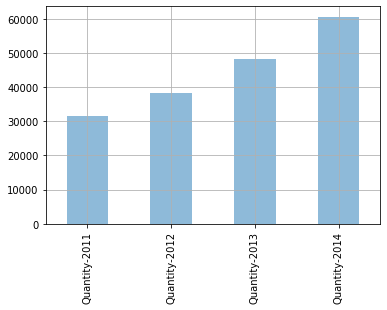

In [22]:
quantity_sum=quantity.sum()
quantity_sum.plot(kind='bar',alpha=0.5)
plt.grid()


rise_12=quantity_sum[1]/quantity_sum[0]-1
rise_13=quantity_sum[2]/quantity_sum[1]-1
rise_14=quantity_sum[3]/quantity_sum[2]-1
rise_rate=[0,rise_12,rise_13,rise_14]


quantity_sum=pd.DataFrame({'quantity_sum':quantity_sum})
quantity_sum['rise_rate']=rise_rate
quantity_sum

Build the income statement:

In [79]:
profit=pd.concat([year_2011['Profit'],year_2012['Profit'],
                 year_2013['Profit'],year_2014['Profit']],axis=1)
profit.columns=['Profit-2011','Profit-2012','Profit-2013','Profit-2014']
profit.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

profit.style.background_gradient(cmap='GnBu')

,Profit-2011,Profit-2012,Profit-2013,Profit-2014
Jan,13457.2,19627.4,26052.4,31447.7
Feb,17588.8,17828.2,31554,29454
Mar,16169.4,22752.9,34873.7,50097
Apr,13405.5,20804,26008.1,35709.5
May,14777.5,22865.4,39053.3,34335.6
Jun,25932.9,34358,43298.8,40869
Jul,10631.8,21725.2,27019.9,26450.7
Aug,19650.7,36511.4,32977.8,46443.5
Sep,32313.3,25039.9,18850.1,52533.8
Oct,30745.5,27773.9,27872,52342.5


Calculate annual total profit and profit rate:

,profit_sum,year,sales_sum,profit_rate
0,248940.81154,2011,2.259451e+06,0.110178
1,307415.27910,2012,2.677439e+06,0.114817
2,406935.23018,2013,3.405746e+06,0.119485
3,504165.97046,2014,4.299866e+06,0.117252


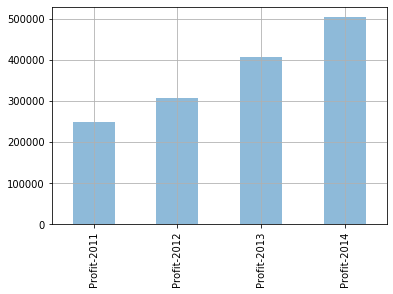

In [24]:
profit_sum=profit.sum()
profit_sum.plot(kind='bar',alpha=0.5)
plt.grid()

profit_sum=pd.DataFrame({'profit_sum':profit_sum})
profit_sum["year"] =  [2011, 2012, 2013, 2014]

sales_sum=pd.DataFrame({'sales_sum':sales.sum()})
sales_sum["year"] =  [2011, 2012, 2013, 2014]

profit_sum = pd.merge(profit_sum, sales_sum)
profit_sum["profit_rate"] = profit_sum["profit_sum"] / profit_sum["sales_sum"]
profit_sum

From the above results, it can be seen that the annual profit, like sales, is increasing year by year, indicating that the business operation is still relatively good, but the profit rate is generally stable, stable between 11%-12%, and the overall profit rate is also not bad.

Customer unit price analysis



Customer unit price refers to the average purchase amount of goods per customer in a shopping mall (supermarket), and customer unit price is also the average transaction amount. To some extent, it reflects the many characteristics of the enterprise's consumer groups and whether the profitability of the enterprise's sales category is healthy.

Total consumption times: All consumption by the same person in the same day is counted as one consumption.

Customer unit price = total consumption amount / total consumption times

In [29]:
for i in range(2011,2015):
    data=df[df['year']==i]
    price=data[['Order_Date','Customer_ID','Sales']]

         
    price_dr=price.drop_duplicates(subset=['Order_Date', 'Customer_ID'])

         
    total_num=price_dr.shape[0]
    print('Total number of consumption per year='.format(i),total_num)

    unit_price = price['Sales'].sum()/total_num
    print( 'annual customer unit price='.format(i), unit_price,'\n')

Total number of consumption per year= 4453
annual customer unit price= 507.3997070604087 

Total number of consumption per year= 5392
annual customer unit price= 496.55762136498515 

Total number of consumption per year= 6753
annual customer unit price= 504.3308824788983 

Total number of consumption per year= 8696
annual customer unit price= 494.4647965225392 



From the above results, the number of consumption per year is on the rise, but the overall fluctuation range of the customer unit price is not very large, stable at about 500.

In [30]:
Market_Year_Sales = df.groupby(['Market', 'year']).agg({'Sales':'sum'}).reset_index().rename(columns={'Sales':'Sales_amounts'})
Market_Year_Sales.head()

,Market,year,Sales_amounts
0,APAC,2011,6.392453e+05
1,APAC,2012,7.627193e+05
2,APAC,2013,9.745809e+05
3,APAC,2014,1.209199e+06
4,Africa,2011,1.271873e+05


Text(0.5, 1.0, '2011-2014 market sales')

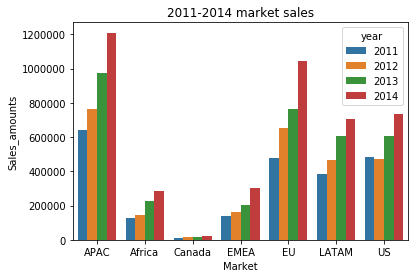

In [31]:
sns.barplot(x='Market', y='Sales_amounts', hue='year', data = Market_Year_Sales)
plt.title('2011-2014 market sales')

In [80]:
Market_Sales = df.groupby(['Market']).agg({'Sales':'sum'})
Market_Sales["percent"] = Market_Sales["Sales"] / df["Sales"].sum()
Market_Sales.style.background_gradient(cmap='GnBu')

,Sales,percent
Market,,
APAC,3.58574e+06,0.283626
Africa,783773,0.0619951
Canada,66928.2,0.0052939
EMEA,806161,0.063766
EU,2.93809e+06,0.232398
LATAM,2.16461e+06,0.171217
US,2.2972e+06,0.181705


As can be seen from the above chart, the annual sales of each region are generally on the rise, and the sales of APAC (Asia Pacific), EU (European Union), US (United States), and LATAM (Latin America) exceed 85 of the total sales. %, the overall situation also matches the regional economic development. Among them, Canada's sales are minimal, which can be combined with the company's overall strategic layout.

In [33]:
productId_count = df.groupby('Product_ID').count()['Customer_ID'].sort_values(ascending=False)
print(productId_count.head(10))

Product_ID
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10002799    30
OFF-BI-10003708    30
FUR-CH-10003354    28
OFF-BI-10002570    27
OFF-BI-10004140    25
OFF-BI-10004195    24
OFF-BI-10001808    24
OFF-BI-10004632    24
Name: Customer_ID, dtype: int64


Top 10 products in sales:

In [35]:
productId_amount = df.groupby('Product_ID').sum()['Sales'].sort_values(ascending=False)
print(productId_amount.head(10))

Product_ID
TEC-CO-10004722    61599.8240
TEC-PH-10004664    30041.5482
OFF-BI-10003527    27453.3840
TEC-MA-10002412    22638.4800
TEC-PH-10004823    22262.1000
FUR-CH-10002024    21870.5760
FUR-CH-10000027    21329.7300
OFF-AP-10004512    21147.0840
FUR-TA-10001889    20730.7557
OFF-BI-10001359    19823.4790
Name: Sales, dtype: float64


In [36]:
productId_Profit= df.groupby('Product_ID').sum()['Profit'].sort_values(ascending=False)
print(productId_Profit.head(10))

Product_ID
TEC-CO-10004722    25199.9280
OFF-AP-10004512    10345.5840
TEC-PH-10004823     8121.4800
OFF-BI-10003527     7753.0390
TEC-CO-10001449     6983.8836
FUR-CH-10002250     6123.2553
TEC-PH-10004664     5455.9482
OFF-AP-10002330     5452.4640
TEC-PH-10000303     5356.8060
FUR-CH-10002203     5003.1000
Name: Profit, dtype: float64


Half of the top 10 profitable products are electronic products, and we can focus on increasing the sales of these products to increase overall profit.



In [37]:
df['Category_Sub_Category'] = df[['Category','Sub_Category']].apply(lambda x:str(x[0])+'_'+str(x[1]),axis=1)

df_Category_Sub_Category=df.groupby("Category_Sub_Category").agg({"Profit":"sum","Sales":"sum"}).reset_index()

df_Category_Sub_Category.sort_values(by=["Sales"],ascending=False, inplace=True)
 
df_Category_Sub_Category['cum_percent'] = df_Category_Sub_Category['Sales'].cumsum()/df_Category_Sub_Category['Sales'].sum()
df_Category_Sub_Category

,Category_Sub_Category,Profit,Sales,cum_percent
16,Technology_Phones,216717.00580,1.706824e+06,0.135007
14,Technology_Copiers,258567.54818,1.509436e+06,0.254401
1,Furniture_Chairs,140396.26750,1.501682e+06,0.373181
0,Furniture_Bookcases,161924.41950,1.466572e+06,0.489184
11,Office Supplies_Storage,108461.48980,1.127086e+06,0.578335
4,Office Supplies_Appliances,141680.58940,1.011064e+06,0.658308
15,Technology_Machines,58867.87300,7.790601e+05,0.719931
3,Furniture_Tables,-64083.38870,7.570419e+05,0.779811
13,Technology_Accessories,129626.30620,7.492370e+05,0.839075
6,Office Supplies_Binders,72449.84600,4.619115e+05,0.875611


Proportion of different types of customers


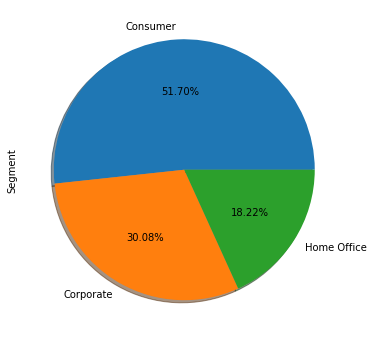

In [39]:
df["Segment"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, figsize=(14, 6))

As can be seen from the figure above, in the past four years, ordinary consumers accounted for the largest proportion of customers, reaching 51.7%.

Look at the number of different types of customers each year:

Text(0.5, 1.0, '2011-2014 Segment Customer')

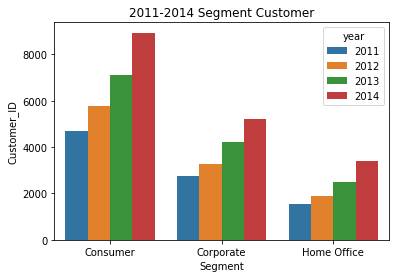

In [40]:
Segment_Year = df.groupby(["Segment", 'year']).agg({'Customer_ID':'count'}).reset_index()
sns.barplot(x='Segment', y='Customer_ID', hue='year', data = Segment_Year)
plt.title('2011-2014 Segment Customer')

It can be seen from the above that each type of customer is maintaining a growth trend every year, and the customer structure is still very good.

Take a look at the annual sales contributed by different types of customers:

Text(0.5, 1.0, '2011-2014 Segment Sales')

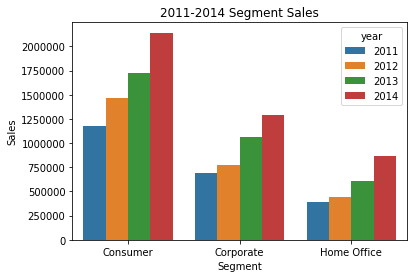

In [41]:
Segment_sales = df.groupby(["Segment", 'year']).agg({'Sales':'sum'}).reset_index()
sns.barplot(x='Segment', y='Sales', hue='year', data = Segment_sales)
plt.title('2011-2014 Segment Sales')


The sales contributed by all types of customers are steadily increasing each year, and ordinary consumers contribute the most sales, which has a certain relationship with the proportion of customers.

First intercept Customer_ID, Order_Date, Quantity, Sales, month as a new subset, and sort Order_Date to facilitate subsequent analysis:

In [42]:
grouped_Customer = df[['Customer_ID','Order_Date','Quantity', 'Sales', 'month']].sort_values(['Order_Date']).groupby('Customer_ID')
grouped_Customer.head()

,Customer_ID,Order_Date,Quantity,Sales,month
0,TB-11280,2011-01-01,2,408.300,2011-01-01
1,JH-15985,2011-01-01,3,120.366,2011-01-01
2,AT-735,2011-01-01,4,66.120,2011-01-01
3,EM-14140,2011-01-01,3,44.865,2011-01-01
4,JH-15985,2011-01-01,5,113.670,2011-01-01
...,...,...,...,...,...
43838,AD-180,2014-12-26,4,275.712,2014-12-01
43902,DB-3555,2014-12-26,1,18.180,2014-12-01
43878,AD-180,2014-12-26,2,158.760,2014-12-01
43914,AD-180,2014-12-26,2,4.272,2014-12-01


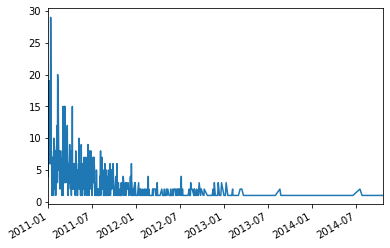

In [43]:
grouped_Customer.min().Order_Date.value_counts().plot()

Let's take a look at the distribution of users' last purchase dates:

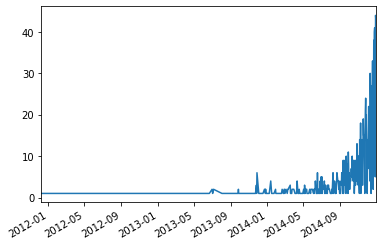

In [44]:
grouped_Customer.max().Order_Date.value_counts().plot()

It can be seen from the above that the new user growth trend is slow after the beginning of 2013, and businesses can absorb more new users through advertising and other promotion strategies; and by observing the last purchase date, it can be found that users have basically not lost, and it has also been verified every year. The growth trend of sales.

Generally speaking, the number of new customers is decreasing year by year, indicating that the company's old customers are well maintained, but the new customer acquisition rate is low. If you can make a breakthrough in the acquisition of new customers, it will bring a lot of room for growth.

Let's take a look at the number of customers who have only purchased once:

In [45]:
Customer_life = grouped_Customer.Order_Date.agg(['min','max'])
 
(Customer_life['min'] == Customer_life['max']).value_counts()

False    1580
True       10
dtype: int64

From the results, there are only 10 users who only purchased once, and most users will buy multiple times, indicating a high return rate and also verifying the above conclusion that the company's old customers are well maintained.